In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

In [9]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3  

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Count ')

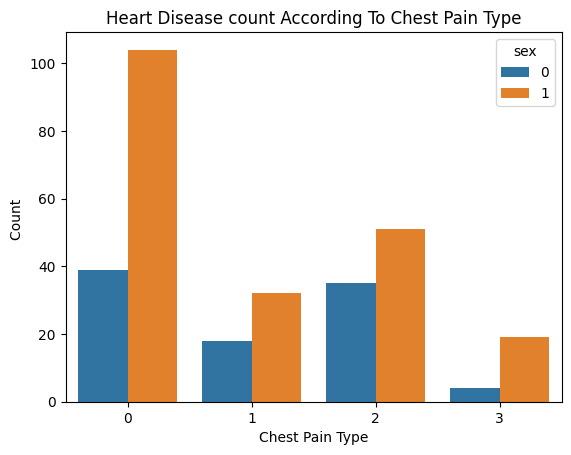

In [17]:
ax = sns.countplot(x="cp",hue="sex", data=data ,palette="tab10")
plt.title('Heart Disease count According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count ')

In [18]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

Text(0, 0.5, 'trst beats per second ')

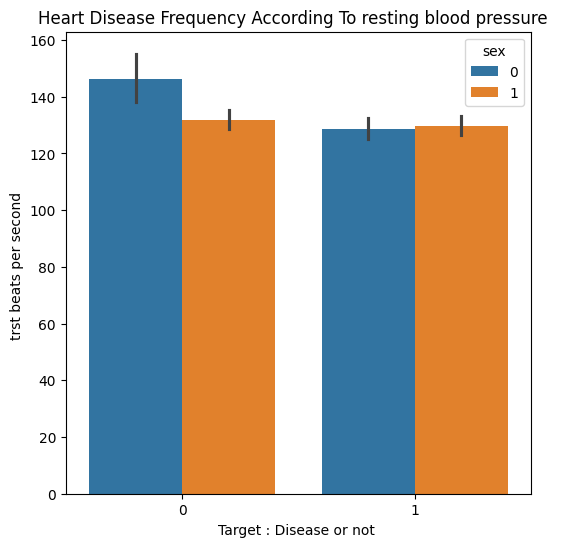

In [19]:
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="target",y="trestbps", hue="sex", data=data)
plt.title('Heart Disease Frequency According To resting blood pressure  ')
plt.xlabel('Target : Disease or not ')
plt.ylabel('trst beats per second ')

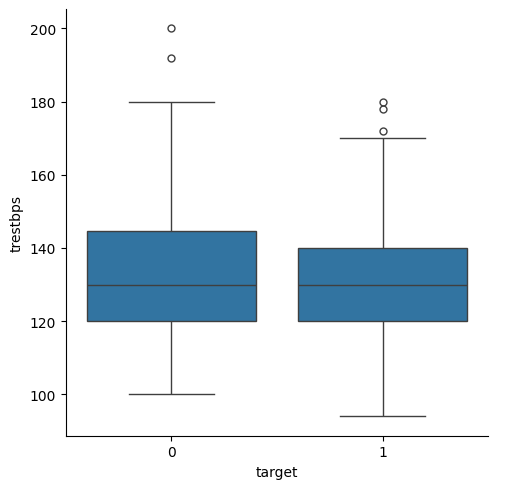

In [20]:
sns.catplot(x="target", y="trestbps", data=data, kind="box")

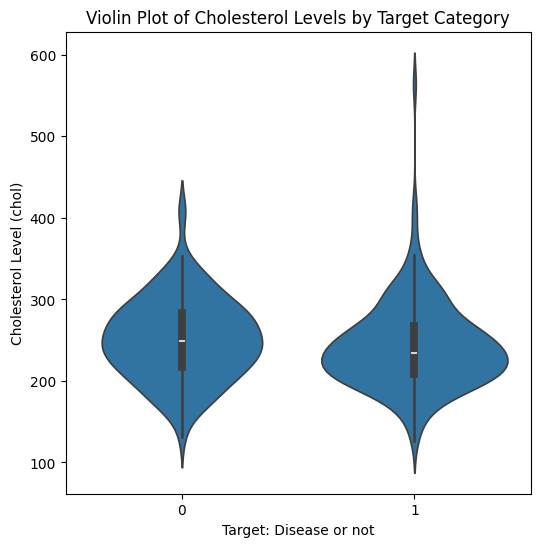

In [21]:
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)


sns.violinplot(x=data['target'], y=data['chol'], ax=ax)

plt.title('Violin Plot of Cholesterol Levels by Target Category')
plt.xlabel('Target: Disease or not')
plt.ylabel('Cholesterol Level (chol)')

plt.show()

<Axes: xlabel='target', ylabel='thalach'>

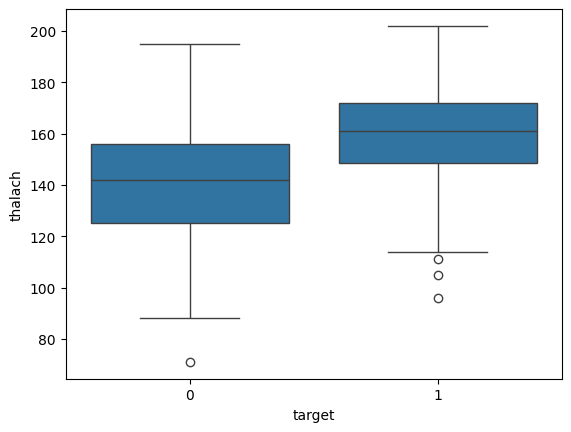

In [22]:
sns.boxplot(y=data['thalach'], x=data['target'])

In [23]:
import plotly.express as px

In [24]:
fig = px.scatter(data, x="thalach", y="age", color="target")
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=140,
            y0=0,
            x1=140,
            y1=80,
            line=dict(
                color="RoyalBlue",
                width=3
            )
))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=190,
            y0=0,
            x1=190,
            y1=80,
            line=dict(
                color="RoyalBlue",
                width=3
            )
))

In [25]:
sns.set_palette("Paired")

<Axes: xlabel='target', ylabel='oldpeak'>

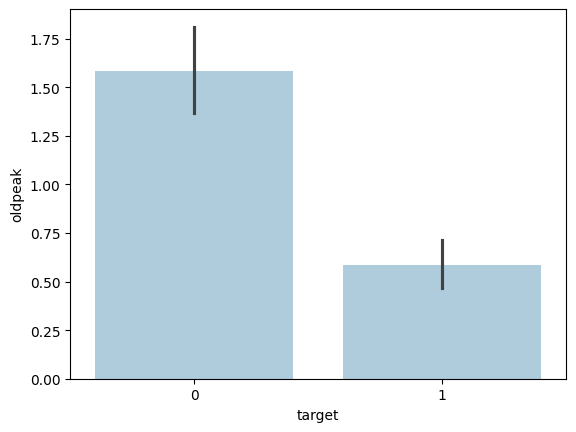

In [26]:
sns.barplot(x=data["target"], y=data["oldpeak"])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [29]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [30]:
X = data.drop('target',axis=1)

In [31]:
y = data['target']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [34]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [35]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred1 = log.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

[[24  8]
 [ 5 24]]


<Axes: >

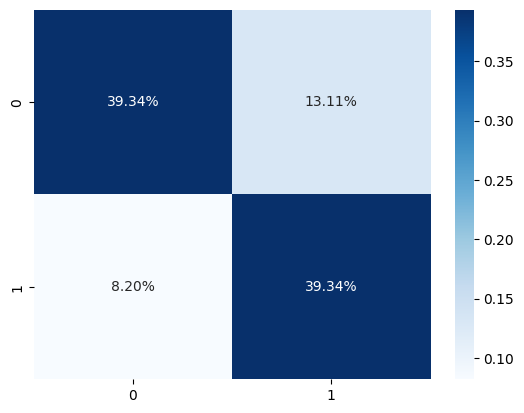

In [41]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [42]:
precisions={}
recalls={}
f1_scores={}
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred1)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred1)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['Logistic Reg'] = f1
print(f1)

Recall: 0.828
Precision: 0.750
0.7868852459016394


In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred2 = svm.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

[[24  8]
 [ 4 25]]


<Axes: >

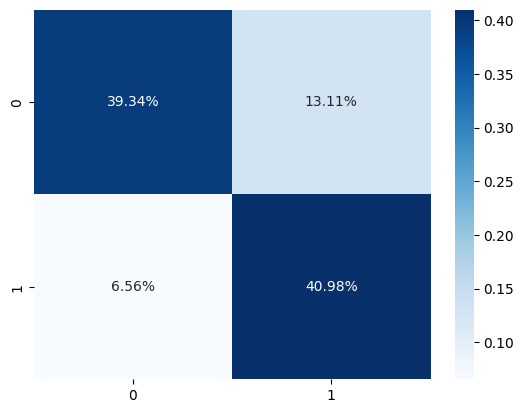

In [48]:
cf_matrix = confusion_matrix(y_test, y_pred2)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [49]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred2)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred2)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['SVM'] = f1
print(f1)

Recall: 0.862
Precision: 0.758
0.8064516129032258


In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [52]:
y_pred3 = nb.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred3)

0.8032786885245902

[[25  7]
 [ 5 24]]


<Axes: >

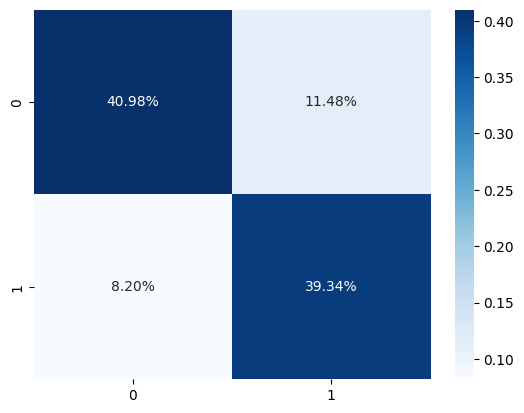

In [54]:
cf_matrix = confusion_matrix(y_test, y_pred3)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [55]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred3)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred3)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['KNN'] = f1
print(f1)

Recall: 0.828
Precision: 0.774
0.7999999999999999


In [56]:
data = pd.read_csv('heart.csv')

In [57]:
data = data.drop_duplicates()

In [58]:
X = data.drop('target',axis=1)
y=data['target']

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()

In [62]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred4= dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

[[24  8]
 [ 7 22]]


<Axes: >

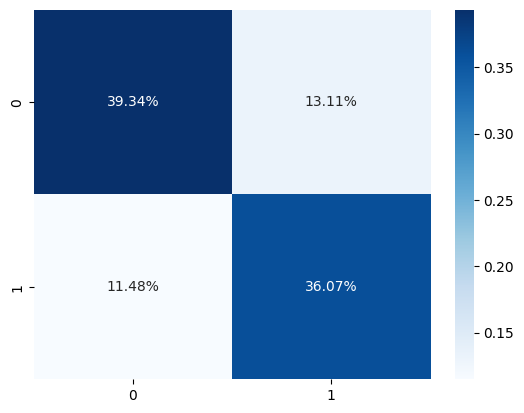

In [65]:
cf_matrix = confusion_matrix(y_test, y_pred4)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [66]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred4)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred4)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['Decision Tree'] = f1
print(f1)

Recall: 0.759
Precision: 0.733
0.7457627118644068


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier()

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred5= rf.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

[[26  6]
 [ 3 26]]


<Axes: >

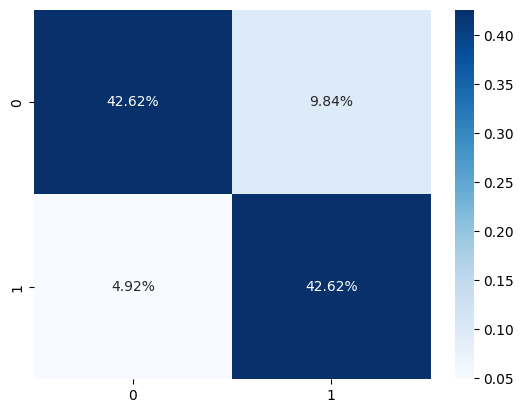

In [72]:
cf_matrix = confusion_matrix(y_test, y_pred5)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [73]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred5)
print('Recall: %.3f' % recall)
# precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred5)
print('Precision: %.3f' % precision)
# fi score
f1 = 2*((precision*recall)/(precision+recall))
f1_scores['Random forest'] = f1
print(f1)

Recall: 0.897
Precision: 0.812
0.8524590163934426


In [74]:
final_data = pd.DataFrame({'Models':['LR','SVM','NB','DT','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100
                               ]})

In [75]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,NB,80.327869
3,DT,75.409836
4,RF,85.245902


In [76]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

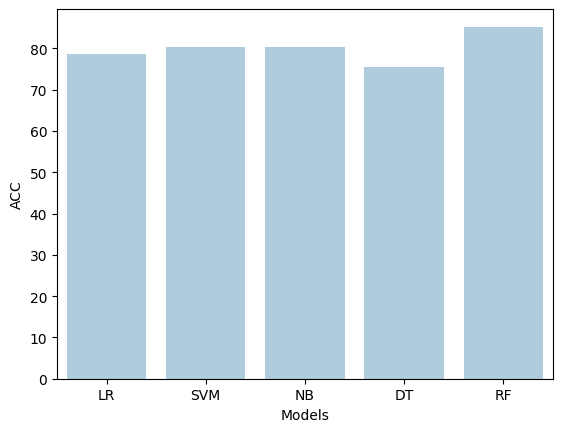

In [77]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [78]:
X=data.drop('target',axis=1)
y=data['target']

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [81]:
import pandas as pd

In [82]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [83]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [84]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [85]:
import joblib

In [86]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [87]:
model = joblib.load('model_joblib_heart')

In [88]:
model.predict(new_data)

array([0], dtype=int64)

In [89]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [92]:
import joblib
import ipywidgets as widgets
from IPython.display import display

# Function to validate inputs
def validate_inputs():
    try:
        age = int(age_input.value)
        if not (1 <= age <= 100):
            return "Age must be between 1 and 100"

        gender = int(gender_input.value)
        if gender not in [0, 1]:
            return "Gender must be 0 (Female) or 1 (Male)"

        cp = int(cp_input.value)
        if cp < 0 or cp > 3:
            return "Chest Pain Type must be in range"

        trestbps = int(trestbps_input.value)
        if trestbps < 90 or trestbps > 200:
            return "Resting Blood Pressure must be between 90 and 200 mm Hg"

        chol = int(chol_input.value)
        if chol < 125 or chol > 560:
            return "Cholesterol must be between 125 and 560 mg/dL"

        fbs = int(fbs_input.value)
        if fbs not in [0, 1]:
            return "Fasting Blood Sugar must be 0 or 1"

        restecg = int(restecg_input.value)
        if restecg < 0 or restecg > 2:
            return "Resting ECG results must be 0, 1, or 2"

        thalach = int(thalach_input.value)
        if not (50 <= thalach <= 300):
            return "Maximum Heart Rate must be between 50 and 300"

        exang = int(exang_input.value)
        if exang not in [0, 1]:
            return "Exercise Induced Angina must be 0 or 1"

        oldpeak = float(oldpeak_input.value)
        if oldpeak < 0:
            return "ST Depression must be positive"

        slope = int(slope_input.value)
        if slope < 0 or slope > 2:
            return "Slope of ST Segment must be 0, 1, or 2"

        ca = int(ca_input.value)
        if ca < 0 or ca > 3:
            return "Number of major vessels must be between 0 and 3"

        thal = int(thal_input.value)
        if thal not in [0, 1, 2, 3]:
            return "Thalassemia must be 0, 1, 2, or 3"

    except ValueError as ve:
        return f"Invalid input: {ve}"

    return None

# Function to predict heart disease
def predict_heart_disease(_):
    # Validate inputs
    validation_error = validate_inputs()
    if validation_error:
        output_label.value = validation_error
        output_label.style = {'description_width': 'initial', 'font_weight': 'bold', 'color': 'red'}
        return

    # Get values from widgets
    features = [
        int(age_input.value),
        int(gender_input.value),
        int(cp_input.value),
        int(trestbps_input.value),
        int(chol_input.value),
        int(fbs_input.value),
        int(restecg_input.value),
        int(thalach_input.value),
        int(exang_input.value),
        float(oldpeak_input.value),
        int(slope_input.value),
        int(ca_input.value),
        int(thal_input.value)
    ]

    # Load the pre-trained model
    model = joblib.load('model_joblib_heart')

    # Predict using the model
    result = model.predict([features])[0]

    # Display prediction result
    if result == 0:
        output_label.value = "No Heart Disease"
        output_label.style = {'description_width': 'initial', 'font_weight': 'bold', 'color': 'green'}
    else:
        output_label.value = "Possibility of Heart Disease"
        output_label.style = {'description_width': 'initial', 'font_weight': 'bold', 'color': 'red'}

# Create input fields using ipywidgets
age_input = widgets.IntText(description='Age:', value=25)
gender_input = widgets.IntText(description='Gender (0=F, 1=M):', value=1)
cp_input = widgets.IntText(description='Chest Pain Type:', value=0)
trestbps_input = widgets.IntText(description='Resting BP:', value=120)
chol_input = widgets.IntText(description='Cholesterol:', value=200)
fbs_input = widgets.IntText(description='Fasting BS (0 or 1):', value=0)
restecg_input = widgets.IntText(description='Rest ECG:', value=1)
thalach_input = widgets.IntText(description='Max Heart Rate:', value=150)
exang_input = widgets.IntText(description='Exercise Induced Angina (0 or 1):', value=0)
oldpeak_input = widgets.FloatText(description='ST Depression:', value=1.0)
slope_input = widgets.IntText(description='Slope of ST Segment:', value=1)
ca_input = widgets.IntText(description='Major Vessels (0-3):', value=0)
thal_input = widgets.IntText(description='Thalassemia (0-3):', value=1)

# Output label for the prediction result
output_label = widgets.Label(value="")

# Button for prediction
predict_button = widgets.Button(description="Predict", button_style='info')
predict_button.on_click(predict_heart_disease)

# Display all widgets
display(age_input, gender_input, cp_input, trestbps_input, chol_input, fbs_input, restecg_input, thalach_input, exang_input, oldpeak_input, slope_input, ca_input, thal_input, predict_button, output_label)


IntText(value=25, description='Age:')

IntText(value=1, description='Gender (0=F, 1=M):')

IntText(value=0, description='Chest Pain Type:')

IntText(value=120, description='Resting BP:')

IntText(value=200, description='Cholesterol:')

IntText(value=0, description='Fasting BS (0 or 1):')

IntText(value=1, description='Rest ECG:')

IntText(value=150, description='Max Heart Rate:')

IntText(value=0, description='Exercise Induced Angina (0 or 1):')

FloatText(value=1.0, description='ST Depression:')

IntText(value=1, description='Slope of ST Segment:')

IntText(value=0, description='Major Vessels (0-3):')

IntText(value=1, description='Thalassemia (0-3):')

Button(button_style='info', description='Predict', style=ButtonStyle())

Label(value='')